In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 8.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import glob
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
'''
#renamed non bleeding images
non_bleeding_image_folder = '/content/drive/MyDrive/Endoscopy/non-bleeding/images'

non_bleeding_images = os.listdir(non_bleeding_image_folder)

for i, image in enumerate(non_bleeding_images, start=1):
    new_name = f'imgnb_{i}.png'
    os.rename(os.path.join(non_bleeding_image_folder, image), os.path.join(non_bleeding_image_folder, new_name))'''

In [ ]:
combined_images_folder = '/content/drive/MyDrive/Endoscopy/comb_images'
bleeding_image_folder = '/content/drive/MyDrive/Endoscopy/bleeding/Images'
non_bleeding_image_folder = '/content/drive/MyDrive/Endoscopy/non-bleeding/images'
os.makedirs(combined_images_folder, exist_ok=True)

In [ ]:
bleeding_images = os.listdir(bleeding_image_folder)
for image1 in bleeding_images:
    shutil.copy(os.path.join(bleeding_image_folder, image1), os.path.join(combined_images_folder, image1))

print('Number of bleeding images:', len(bleeding_images))
c = os.listdir(combined_images_folder)
print('Number of combined images:', len(c))

Number of bleeding images: 400
Number of combined images: 400


In [ ]:
non_bleeding_images = os.listdir(non_bleeding_image_folder)
for image2 in non_bleeding_images:
    shutil.copy(os.path.join(non_bleeding_image_folder, image2), os.path.join(combined_images_folder, image2))

print('Number of non bleeding images:', len(non_bleeding_images))
c2 = os.listdir(combined_images_folder)
print('Number of combined images:', len(c2))

Number of non bleeding images: 707
Number of combined images: 1107


In [ ]:
from collections import Counter

# Count the occurrences of each filename
filename_counts = Counter(c2)

# Find duplicate filenames
duplicate_filenames = [filename for filename, count in filename_counts.items() if count > 1]

if duplicate_filenames:
    print('Duplicate filenames found. Removing duplicates...')

else:
    print('No duplicate filenames found.')


No duplicate filenames found.


In [ ]:
non_bleeding_yolo_txt_folder = '/content/drive/MyDrive/Endoscopy/non-bleeding/yolo_txt'

# Create the YOLO_TXT folder if it doesn't exist
os.makedirs(non_bleeding_yolo_txt_folder, exist_ok=True)

# List non-bleeding images
non_bleeding_images = os.listdir(non_bleeding_image_folder)

# For non-bleeding images, create empty YOLO_TXT files
for image in non_bleeding_images:
    image_name, _ = os.path.splitext(image)
    yolo_txt_path = os.path.join(non_bleeding_yolo_txt_folder, f'{image_name}.txt')
    if not os.path.exists(yolo_txt_path):
        open(yolo_txt_path, 'w').close()

In [ ]:
combined_yolo_txt_folder = '/content/drive/MyDrive/Endoscopy/combined_yolo'
bleeding_yolo_txt_folder = '/content/drive/MyDrive/Endoscopy/bleeding/Bounding boxes/YOLO_TXT'

os.makedirs(combined_yolo_txt_folder, exist_ok=True)

In [ ]:
bleeding_yolo_txt_files = glob.glob(os.path.join(bleeding_yolo_txt_folder, '*.txt'))
for yolo_txt in bleeding_yolo_txt_files:
    shutil.move(yolo_txt, os.path.join(combined_yolo_txt_folder, os.path.basename(yolo_txt)))

In [ ]:
non_bleeding_yolo_txt_folder = '/content/drive/MyDrive/Endoscopy/non-bleeding/yolo_txt'

non_bleeding_yolo_txt_files = glob.glob(os.path.join(non_bleeding_yolo_txt_folder, '*.txt'))
for yolo_txt in non_bleeding_yolo_txt_files:
    shutil.move(yolo_txt, os.path.join(combined_yolo_txt_folder, os.path.basename(yolo_txt)))

In [ ]:
y = os.listdir(combined_yolo_txt_folder)
len(y)

707

In [ ]:
train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

In [ ]:
def train_test_split_yolov8(data_path, split=0.2):
    print("------ PROCESS STARTED -------")

    # Define paths for image and label folders
    img_folder = 'comb_images'
    label_folder = 'combined_yolo'

    img_path = os.path.join(data_path, img_folder)
    label_path = os.path.join(data_path, label_folder)

    img_files = [name for name in os.listdir(img_path) if name.endswith('.png')]
    random.seed(42)
    random.shuffle(img_files)

    test_size = int(len(img_files) * split)
    train_size = len(img_files) - test_size

    train_path_img = "./yolo_data/images/train/"
    train_path_label = "./yolo_data/labels/train/"
    val_path_img = "./yolo_data/images/val/"
    val_path_label = "./yolo_data/labels/val/"
    test_path = "./yolo_data/test"

    os.makedirs(train_path_img, exist_ok=True)
    os.makedirs(train_path_label, exist_ok=True)
    os.makedirs(val_path_img, exist_ok=True)
    os.makedirs(val_path_label, exist_ok=True)

    # Copy images and labels to train and validation folders
    for filex in tqdm(img_files[:train_size]):
        file_name, _ = os.path.splitext(filex)
        shutil.copy2(os.path.join(img_path, filex), os.path.join(train_path_img, filex))
        shutil.copy2(os.path.join(label_path, file_name + '.txt'), os.path.join(train_path_label, file_name + '.txt'))

    print(f"------ Training data created with 80% split {len(img_files[:train_size])} images -------")

    for filex in tqdm(img_files[train_size:]):
        file_name, _ = os.path.splitext(filex)
        shutil.copy2(os.path.join(img_path, filex), os.path.join(val_path_img, filex))
        shutil.copy2(os.path.join(label_path, file_name + '.txt'), os.path.join(val_path_label, file_name + '.txt'))

    print(f"------ Testing data created with a total of {len(img_files[train_size:])} images ----------")
    print("------ TASK COMPLETED -------")

# Modify the data path to your specific parent dataset directory
data_path = '/content/drive/MyDrive/Endoscopy/dataset'  # Replace with the actual parent dataset directory
train_test_split_yolov8(data_path)


------ PROCESS STARTED -------


  0%|          | 0/598 [00:00<?, ?it/s]

FileNotFoundError: ignored

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


#Training

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Endoscopy/dataset.yaml epochs=10 imgsz=640 batch=8 project=/content/drive/MyDrive/Endoscopy/training_results name=endo

100% 21.5M/21.5M [00:01<00:00, 17.6MB/s]
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Endoscopy/dataset.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Endoscopy/training_results, name=endo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, 

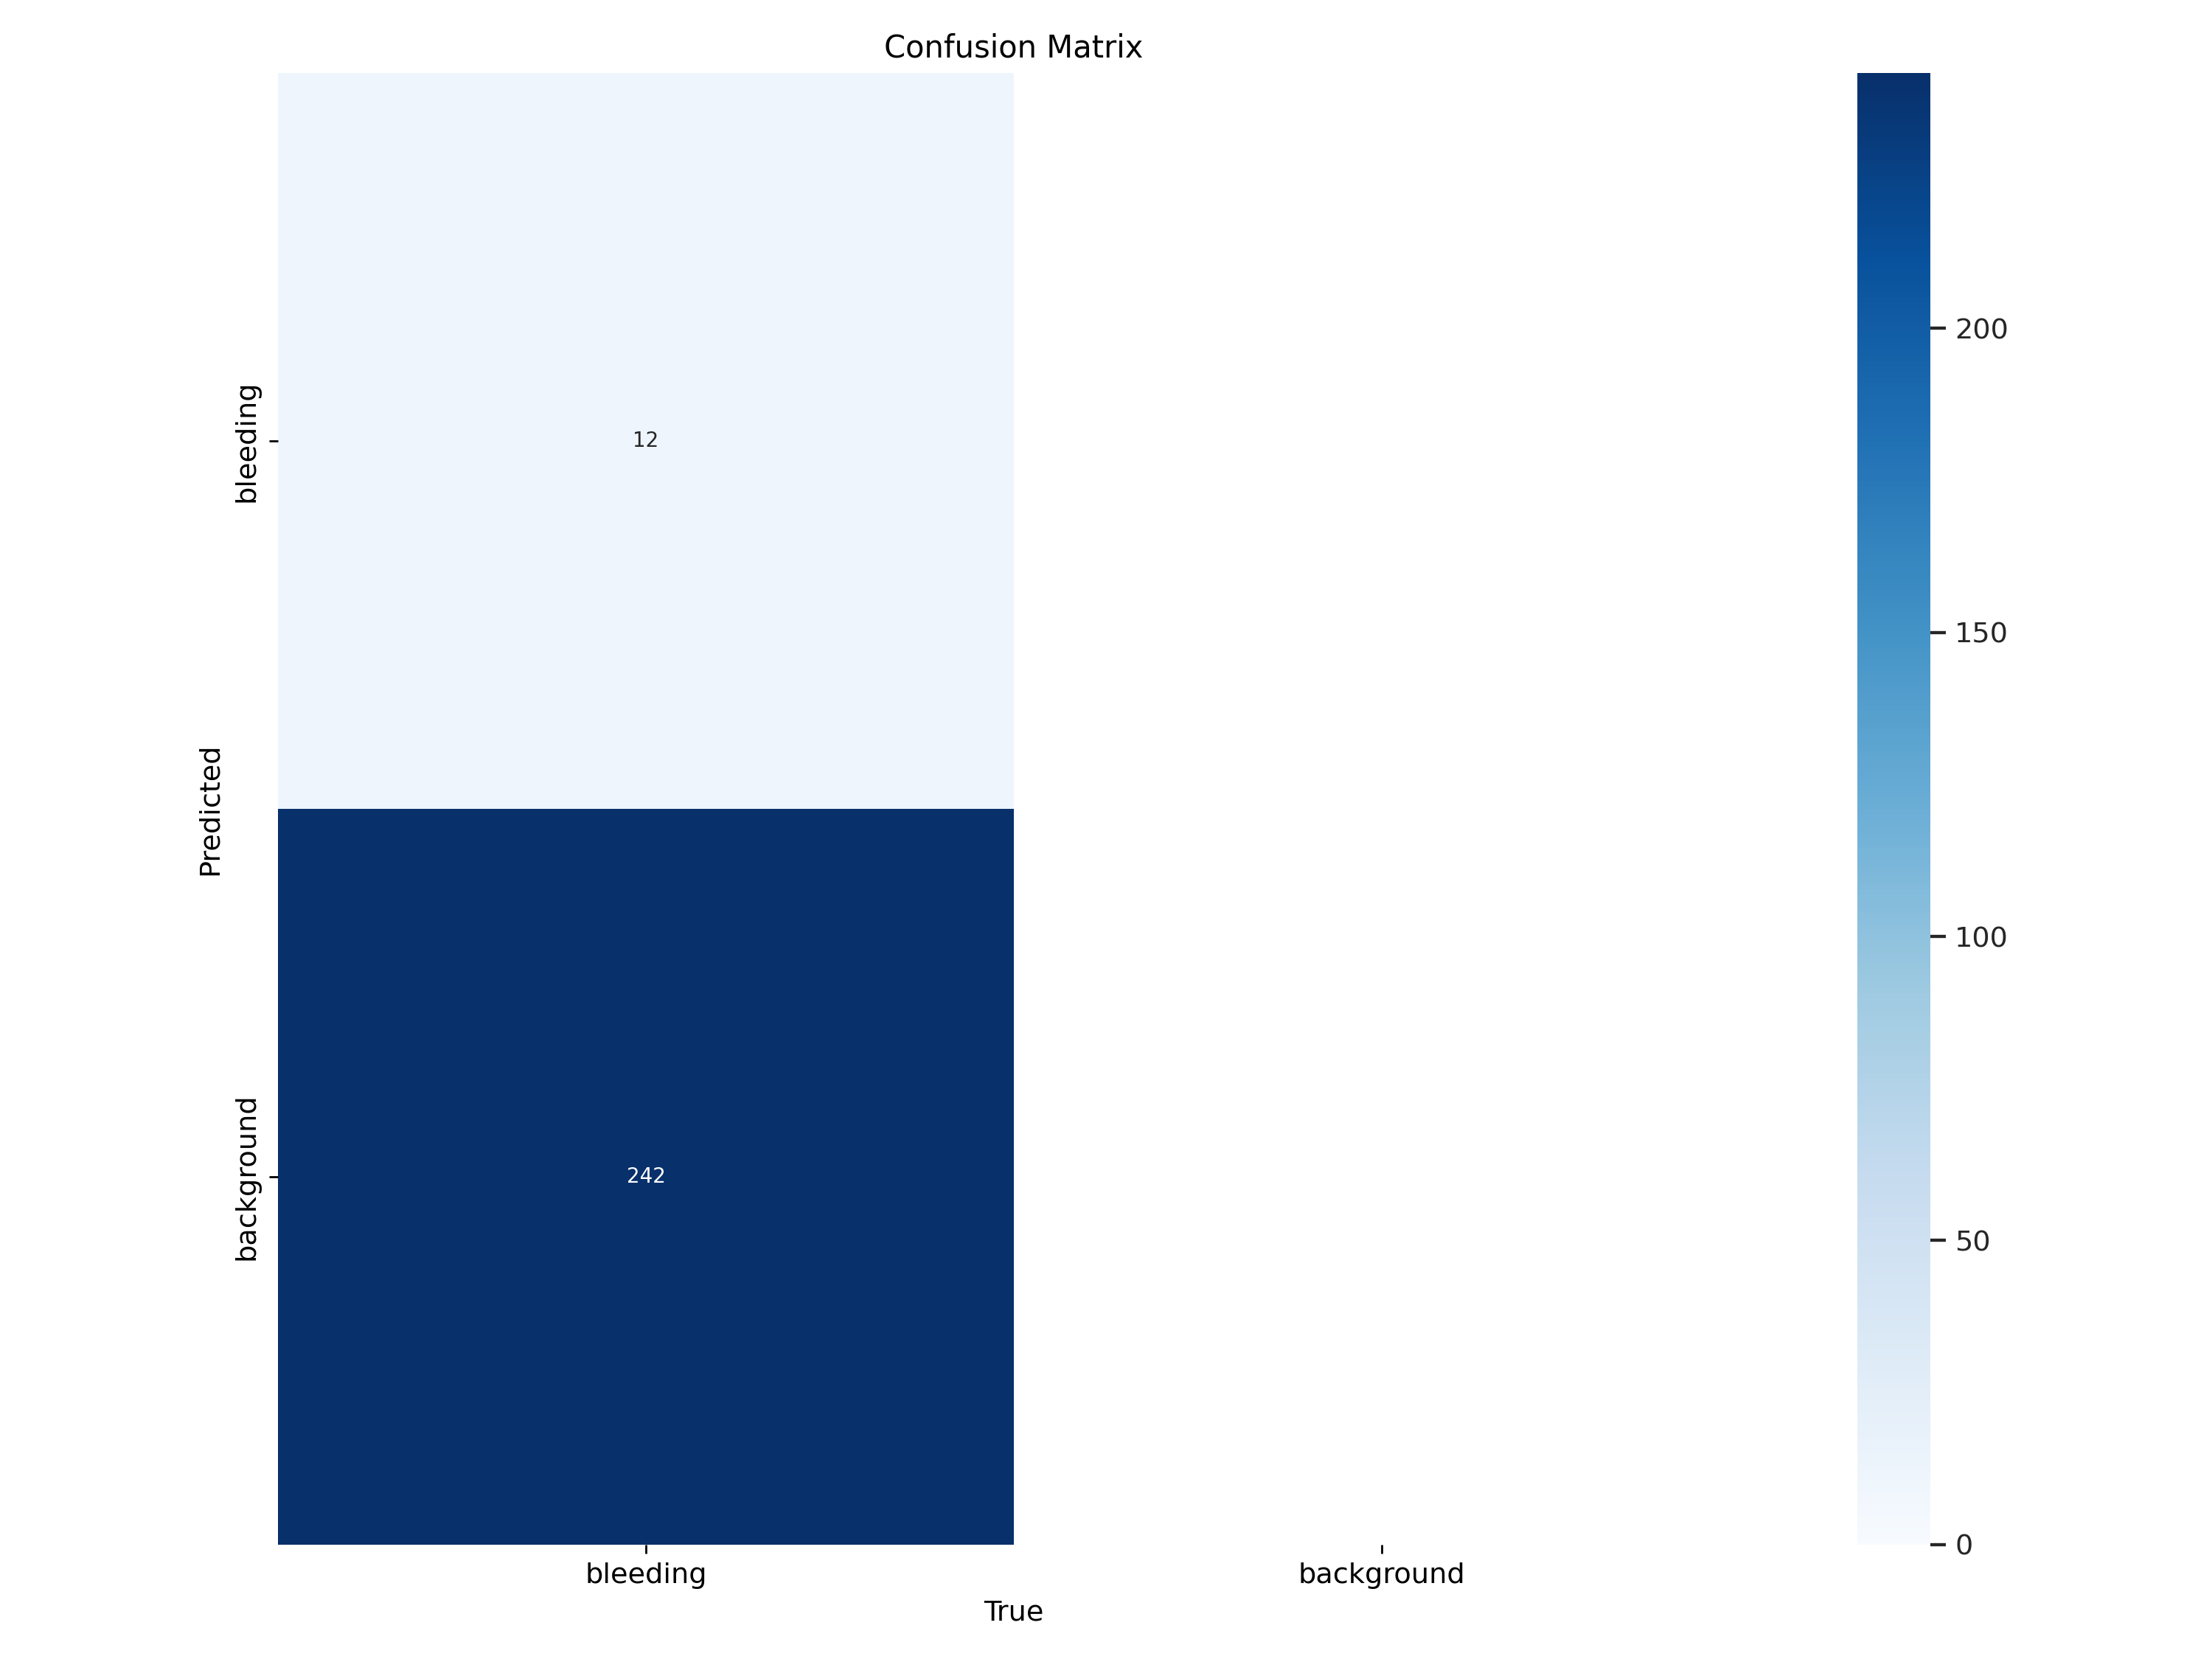

In [ ]:
from IPython.display import Image
Image(filename=f'/content/drive/MyDrive/Endoscopy/training_results/endo/confusion_matrix.png', width = 600)

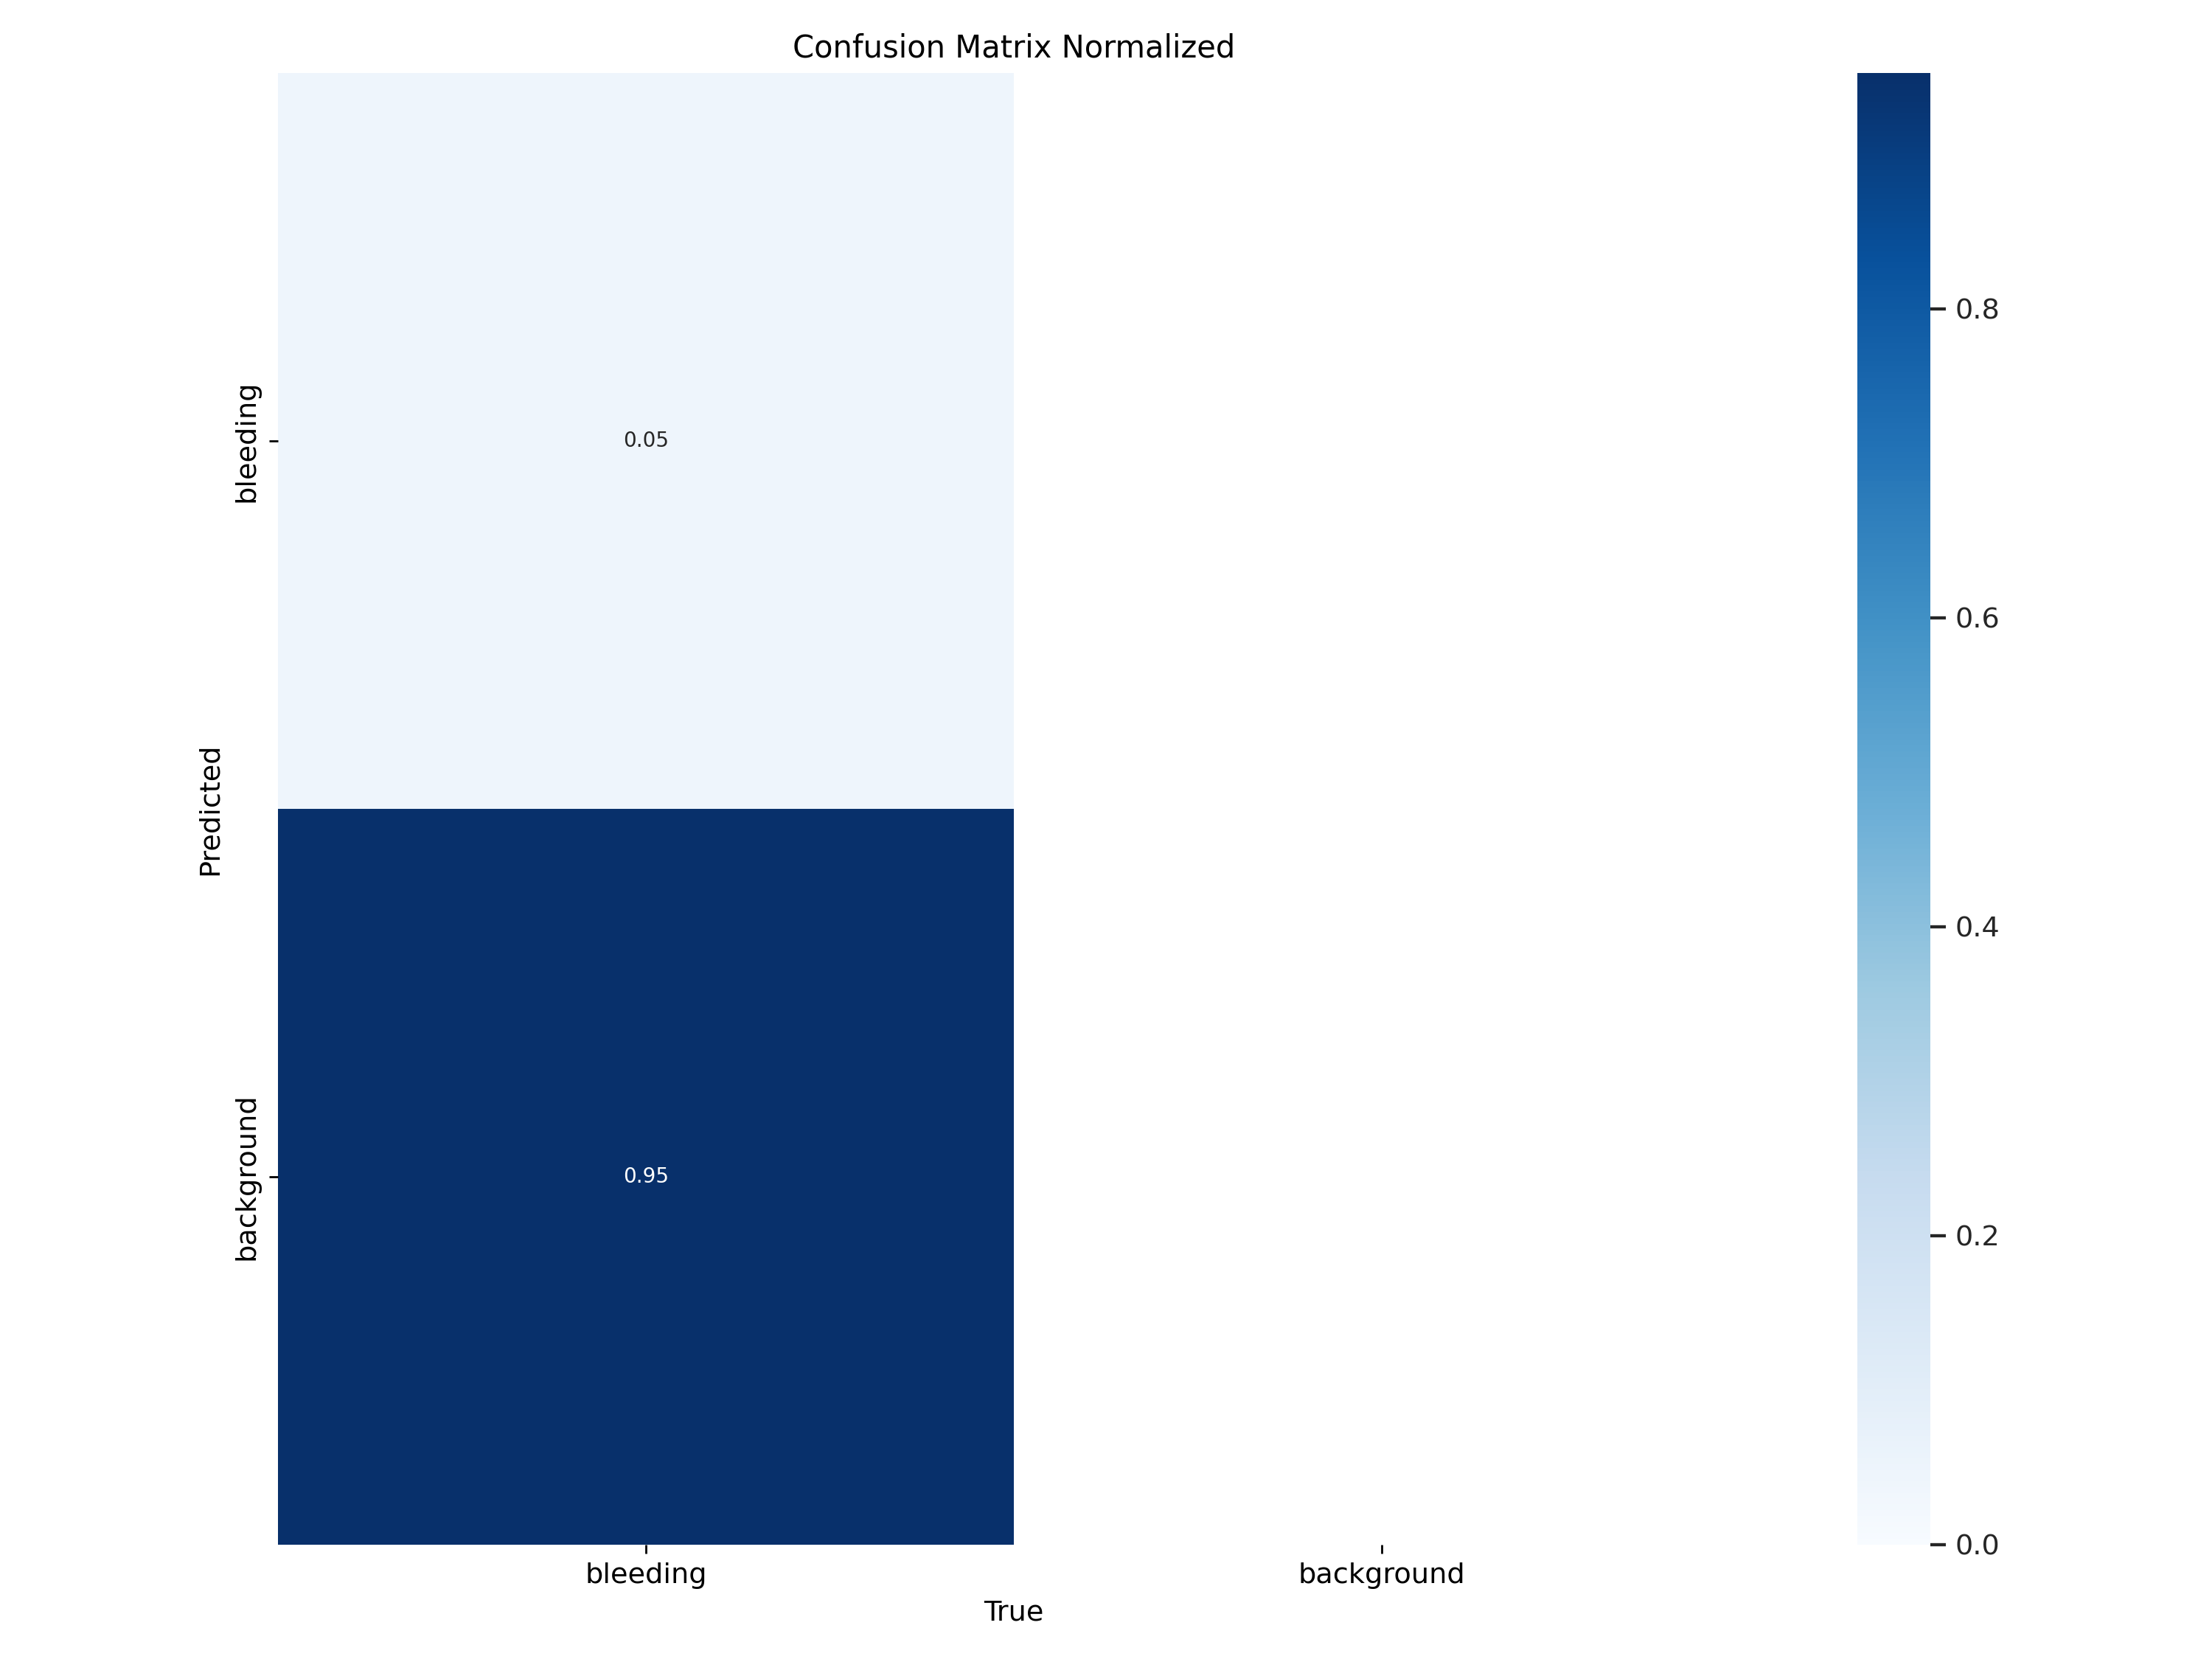

In [ ]:
Image(filename=f'/content/drive/MyDrive/Endoscopy/training_results/endo/confusion_matrix_normalized.png', width = 600)

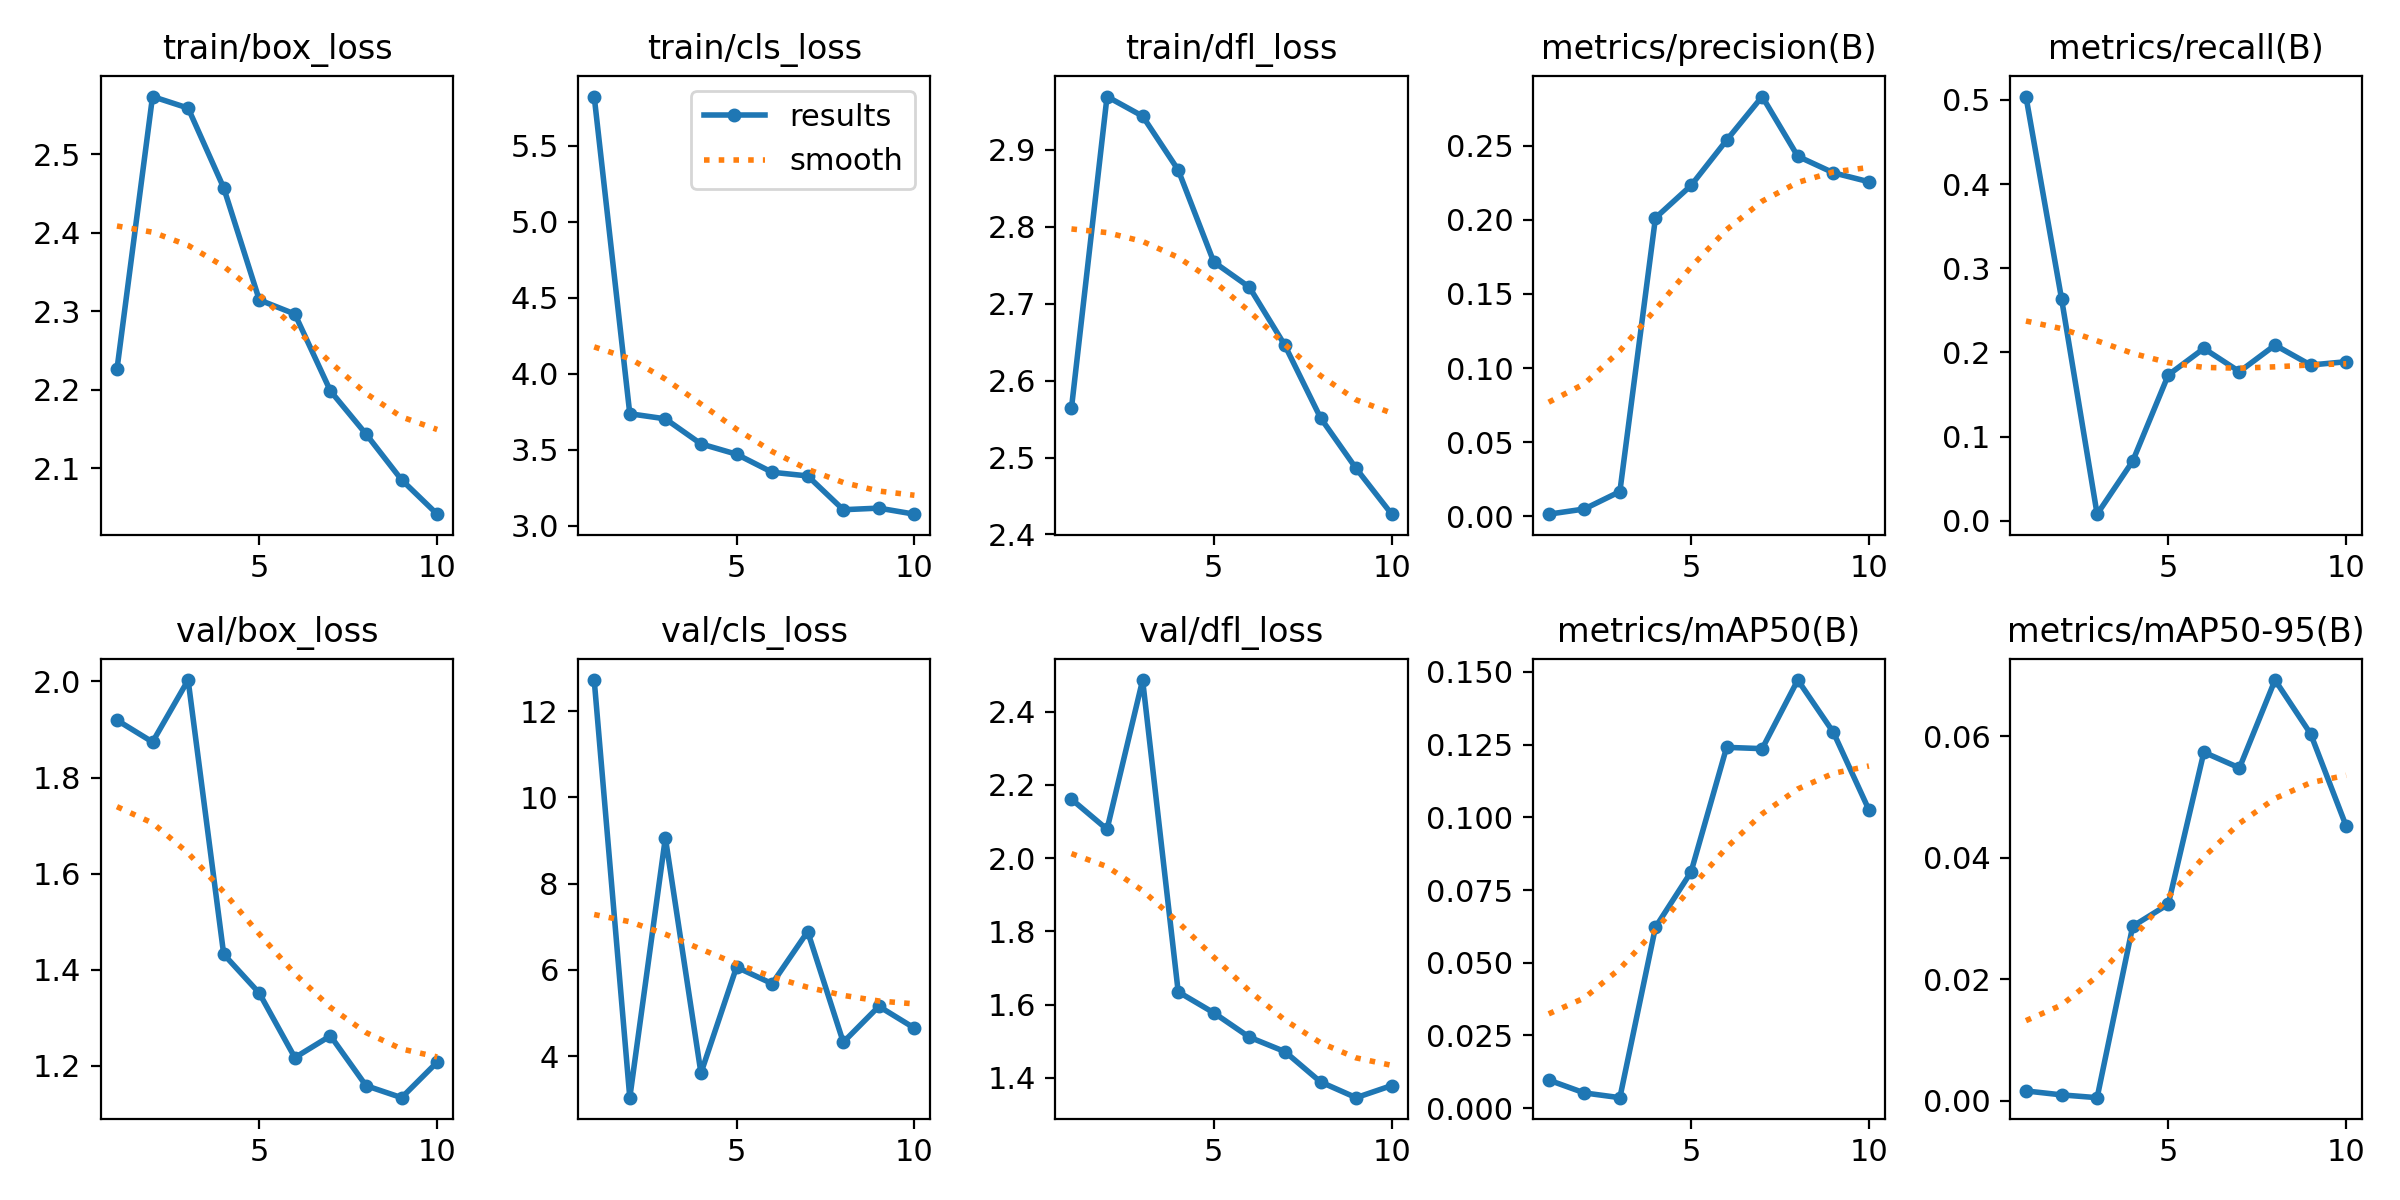

In [ ]:
Image(filename=f'/content/drive/MyDrive/Endoscopy/training_results/endo/results.png', width = 600)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Endoscopy/training_results/endo/weights/best.pt data=/content/drive/MyDrive/Endoscopy/dataset.yaml

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/yolo_data/labels/val.cache... 523 images, 269 backgrounds, 0 corrupt: 100% 523/523 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [00:08<00:00,  3.91it/s]
                   all        523        254      0.243      0.209      0.147     0.0692
Speed: 1.6ms preprocess, 9.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val
